<a href="https://colab.research.google.com/github/GYVVishnu77/Linear-Regression/blob/main/Linear_Regression_from%20scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression: Create and Train Model**
---

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# **Reading the data**

The dataset used is present in my github repo. As there is only one independent variable and one dependent variable, we have to plot graphs only between them.

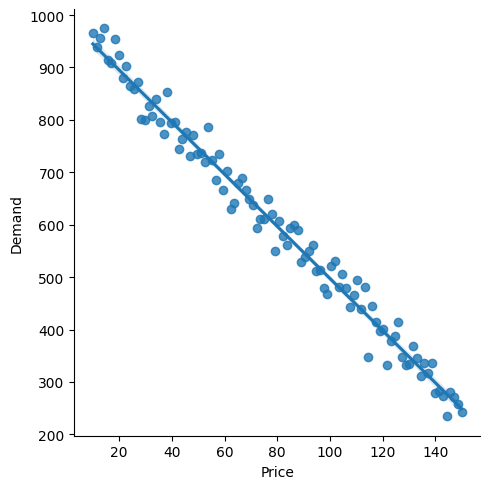

In [8]:

# ─── 1. LOAD & NORMALIZE ───────────────────────────────────────────────────────
data = pd.read_csv('Dataset.csv')
#Plotting the graph to see the relation
sns.lmplot(x='Price', y='Demand', data=data)
plt.show()


As the plot shows a clear relation between the columns, we can confirm the linear relation.

In [9]:
# Assume Dataset.csv has at least three columns: [Col0, Col1, Col2].
# We want: X = 2nd column, y = 3rd column.
x = data.iloc[:, 1:-1].values  # shape (n, 1)
y = data.iloc[:, -1].values.reshape(-1,1)   # shape (n, 1)
#storing mean and std values to use it later on test_pred
y_mean = np.mean(y)
y_std = np.std(y)

# Normalize properly (no int(...) conversion)
x = (x - np.mean(x,axis=0)) / np.std(x,axis=0)
y = (y - np.mean(y)) / np.std(y)

# Add bias column (column of 1s) dynamically
n_samples = x.shape[0]
x = np.concatenate((x, np.ones((n_samples, 1))), axis=1)
# Now x has shape (n, 2): [ (normalized_feature), 1 ]

In the above lines of code, we divide the columns according to independent and  dependent variables and then scale them.

In [10]:
# ─── 2. CUSTOM TRAIN/TEST SPLIT ────────────────────────────────────────────────
def split_data(x, y, test_size=0.3, random_state=0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(x))
    n_test = int(len(x) * test_size)

    test_indices  = indices[:n_test]
    train_indices = indices[n_test:]

    x_train = x[train_indices]
    y_train = y[train_indices]
    x_test  = x[test_indices]
    y_test  = y[test_indices]

    return x_train, x_test, y_train, y_test

In [15]:
# ─── 3. LINEAR REGRESSION CLASS ───────────────────────────────────────────────
class LinearRegressionFromScratch:
  def __init__(self):
        pass

  def forward(self, x_row, y_scalar, w_vector):
        """
        x_row   : 1-D array of shape (num_features,)
        y_scalar: single float
        w_vector: 1-D array of shape (num_features,)

        Returns (loss, y_pred):
          y_pred = dot(x_row, w_vector)
          loss   = (1/2) * (y_pred - y_scalar)^2
        """
        # Corrected indentation for the lines within the forward method
        y_pred = np.dot(x_row, w_vector)
        loss   = (((y_pred - y_scalar)*y_std) ** 2) / 2.0
        return loss, y_pred

  def updateweights(self, x_row, y_pred, y_true, w_vector, alpha):
        """
        x_row   : 1-D array (features for one sample)
        y_pred  : scalar prediction for this sample
        y_true  : scalar true label for this sample
        w_vector: 1-D array (current weights)
        alpha   : learning rate

        Returns updated w_vector.
        """
        for f in range(len(x_row)):
            gradient = (y_pred - y_true) * x_row[f]
            w_vector[f] -= alpha * gradient
        return w_vector

  def train(self, x, y, epochs=10, alpha=0.001, random_state=0):
        """
        x        : (n, num_features) design matrix (already has bias column)
        y        : (n, 1) array of target scalars
        epochs   : how many full passes over the data
        alpha    : learning rate
        random_state: seed for reproducible shuffling

        Returns:
          w_final     : 1-D array of learned weights (length = num_features)
          train_loss  : list of total loss at each epoch
          epoch_list  : list of epoch indices [0, 1, ..., epochs-1]
        """
        n_samples, num_features = x.shape
        # Initialize w with small random values scaled by 1/sqrt(n)
        w = np.random.randn(num_features) / np.sqrt(n_samples)
        train_loss = []
        epoch_list = []
        indices = np.arange(n_samples)

        for epoch in range(epochs):
            total_cost = 0.0
            np.random.seed(random_state+epoch)
            np.random.shuffle(indices)
            for i in indices:
                x_row    = x[i]       # shape (num_features,)
                y_scalar = y[i][0]    # scalar
                loss, y_pred = self.forward(x_row, y_scalar, w)
                total_cost += loss
                # Update weights using that single-sample gradient
                w = self.updateweights(x_row, y_pred, y_scalar, w, alpha)
            train_loss.append(total_cost)
            epoch_list.append(epoch)
        return w, train_loss, epoch_list

  def test(self, x_test, y_test, w_trained):
        """
        x_test      : (m, num_features) design matrix for test set
        y_test      : (m, 1) true targets
        w_trained   : 1-D array of final weights from training

        Returns:
          test_predictions : list of m predicted scalars
          test_losses      : list of m per-sample losses
        """
        test_predictions = []
        test_losses      = []
        m = x_test.shape[0]
        for i in range(m):
          x_row    = x_test[i]       # (num_features,)
          y_scalar = y_test[i][0]    # scalar
          loss, y_pred = self.forward(x_row, y_scalar, w_trained)
          test_predictions.append(y_pred)
          test_losses.append(loss)
        return test_predictions, test_losses

  def plotloss(self, loss_list, epoch_list):
    plt.plot(epoch_list, loss_list, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Total Training Loss')
    plt.title('Training Loss over Epochs')
    plt.grid(which='both', linestyle='--', alpha=0.5)
    plt.show()

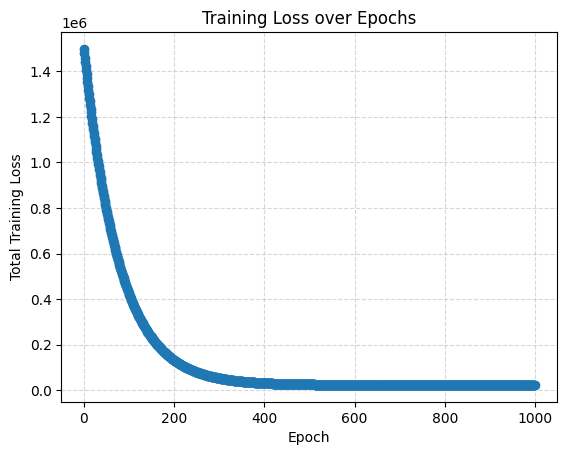

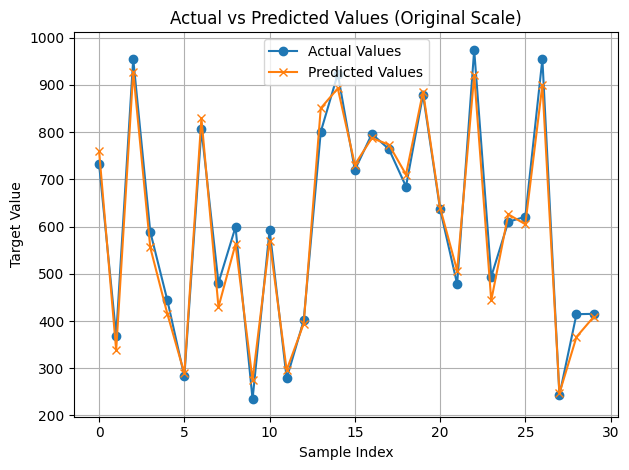

Predicted values (original scale):
Sample 1: 759.4550796920032
Sample 2: 338.2649392859726
Sample 3: 927.9311358544155
Sample 4: 555.8839817774327
Sample 5: 415.50381476879926
Sample 6: 289.1219529569248
Sample 7: 829.6451631963199
Sample 8: 429.55175934568865
Sample 9: 562.9327737559425
Sample 10: 275.1236477601658
Sample 11: 569.9319263543221
Sample 12: 296.17074493543475
Sample 13: 394.45671759353036
Sample 14: 850.7418997517193
Sample 15: 892.8360941022572
Sample 16: 731.4088299183549
Sample 17: 787.5509688457821
Sample 18: 773.5030242688927
Sample 19: 710.3120933629555
Sample 20: 885.8369415038776
Sample 21: 640.1220098586388
Sample 22: 506.74099544838487
Sample 23: 920.9319832560361
Sample 24: 443.59970392257804
Sample 25: 626.0740652817494
Sample 26: 605.0269681064805
Sample 27: 899.884886080767
Sample 28: 247.027758606387
Sample 29: 366.3608284397515
Sample 30: 408.50466217041975


In [19]:
# ─── 4. RUNNING TRAIN / TEST ──────────────────────────────────────────────────
x_train, x_test, y_train, y_test = split_data(x, y, test_size=0.3, random_state=0)
regressor = LinearRegressionFromScratch()
w_trained, train_loss, epoch_list = regressor.train(x_train, y_train, epochs=1000, alpha=0.0001, random_state=0)
test_pred, test_loss = regressor.test(x_test, y_test, w_trained)
# Plot the training loss curve
regressor.plotloss(train_loss, epoch_list)
# Print out the test losses (just to inspect)
test_pred = np.array(test_pred)
# Rescale predictions to original scale
original_test_pred = test_pred * y_std + y_mean
print("\n")
#Prediction v/s Actual plot
plt.plot(y_test*y_std + y_mean, label='Actual Values', marker='o')
plt.plot(original_test_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values (Original Scale)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Print predictions in original scale
print("Predicted values (original scale):")
for i, pred in enumerate(original_test_pred):
    print(f"Sample {i+1}: {pred}")